<a href="https://colab.research.google.com/github/subhasiz/python/blob/master/EXP_8_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

**Linear regression** is a linear model, i.e. a model that assumes a linear relationship between the input variables ($X$) called ```independent``` variables and the single output variable ($y$) called ```dependent``` variable. More specifically, that the output variable, $y$, can be calculated from a linear combination of the input variables ($X$).

A linear relationship is a statistical term used to describe a straight-line relationship between a variable and a constant.

Linear regression is an attractive model because the representation is so simple.

The linear equation assigns one scale factor coefficient to each input value, called ```slope``` and represented by the Greek letter ```Beta``` ($\beta$). One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the ```intercept``` (or the ```bias```) coefficient.

---
#Simple Linear Regression

In a **simple regression problem**, the output variable, $y$, depends on a single input variable $x$.

Let us suppose that we are given the following data points -

| x   | y  |
|:---:|:--:|
| 1   | 6  |
| 2   | 5  |
| 3   | 7  |
| 4.5 | 10 |

We can draw a ```scatterplot``` with the data and try to fit a line on it.

/home/meaou/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


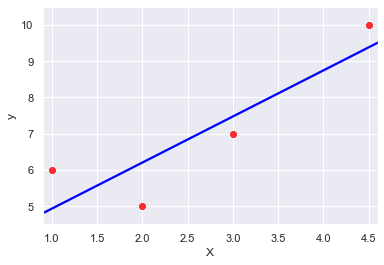

In [ ]:
X = [1,2,3,4.5]
y = [6,5,7,10]
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
ax = sns.regplot(x=X, y=y, truncate=False, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
ax.set(xlim=(0.9,4.6),ylim=(4.5,10.5))
ax.set(xlabel='X', ylabel='y')
plt.setp(ax.collections[1], alpha=0.0)
plt.show()

In the graph shown above, the data points are given in red. The blue line is the representation of a linear regression model. The simple linear regression model, which is essentially a line on a $2$-D plane, would be of the form -

$$\tilde{y} = \beta_{1}x + \beta_0$$.

---
Given the above regression model, if someone were to ask me to predict the output $\tilde{y}$ when input is $x=3.5$, I could use the equation of the regression line to predict $\tilde{y}=8.11$

Given input parameters $x,\;\beta_{0}$ and $\beta_{1}$, implement the following function to predict $\tilde{y}$.

In [ ]:
def predict(x,beta_1,beta_0):
  y_hat = x*beta_1 + beta_0
  return y_hat

We can see that the (```red```) data points don't fall perfectly on the (```blue```) line. For example, at $x=1$, the predicted output, $\tilde{y}$, of the regression model is $5$, while the true output, $y$, should've been $6$. This difference between the actual output, ${y}$, and the predicted output, $\tilde{y}$ is an error in our prediction called ```residual``` ($\epsilon$).

*Note that we are using $\tilde{y}$ to denote the predicted output and $y$ to denote the real output. The difference between $\tilde{y}$ and $y$ is the residual, denoted by $\epsilon$.*

The actual output, ${y}$, is simply the sum of predicted output, $\tilde{y}$,  and the residual, $\epsilon$, i.e. $y = \tilde{y}+\epsilon$

####**An infinite number of lines can be drawn on a plane of data points by changing the value of $\beta_1$ and $\beta_0$.**

**How can we find one specific values of each $\beta_1$ and $\beta_0$ to choose a single line (for our linear model) out of all these infinite number of lines?**

---

Suppose we have a dataset of $N$ data points $\{(x_i, y_i), 1\:{\leq}\:i\:{\leq}\:n\}$.

We can describe the underlying relationship between $x_i$, $\tilde{y}_i$, $y_i$ and ${\epsilon}_i$ by -
<br />
<br />
$$y_i={\tilde{y_{i}}+\epsilon _{i}}$$

$$\Rightarrow {y_{i}=\beta_1 x_{i}+\beta_0+\epsilon _{i}}$$

$$\Rightarrow {\epsilon _{i} = y_{i}-\beta_1 x_{i}-\beta_0}$$
<br />
The ```sum of squared residuals```, $Q(\beta_1,\beta_0)$, for some fixed value of $\beta_1$ and $\beta_0$, gives us a sense of the total residual error in the entire dataset. The function $Q(\beta_1,\beta_0)$ is given by -
<br />
<br />
$$Q(\beta_1,\beta_0)={\sum_{i=1}^{N}{\epsilon _{i}{^2}}}={\sum_{i=1}^{N}{(y_{i}-\beta_1 x_{i}-\beta_0)}^2}$$
<br />
Our objective in drawing the regression line is to minimize the residual error. 

Hence, we have to choose $\beta_1$ and $\beta_0$ in such a way that $Q(\beta_1,\beta_0)$ is minimized. It turns out that setting the value of $\beta_1$ and $\beta_0$ using the following equations minimizes $Q(\beta_1,\beta_0)$ -
<br /><br />
$$\beta_1 = \frac{\sum_{i=1}^{N}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=1}^{N}(x_i - \bar{x})^2}$$
<br />
$$\beta_0 = \bar{y}-\beta_1 \bar{x}$$
<br />
where ${\bar {x}}$ and ${\displaystyle {\bar {y}}}$ as the average of the $x_i$ and $y_i$, respectively.

> Derivations of the above equations is simple and interesting - we already studied how to find maxima and minima of a function with respect to one variable in calculus. Here, we have to minimize with respect to two variables ($\beta_0$ and $\beta_1$), and hence, need partial derivatives. The two partial derivatives will give us two equations, which we need to solve to arrive at the above equations. For this experiment, we needn't go into these details.

Implement the function below to output ```beta_1``` and ```beta_0``` using the above formula, given parameters ```X``` and ```y```.

In [ ]:
def train(X,y):
  '''
  Input -
    X - Array of independent input variables
    y - Array of dependent output variables
  '''
  x_bar = sum(X)/len(X)
  y_bar = sum(y)/len(y)

  beta_1_numerator = 0
  for i in range(len(X)):
    beta_1_numerator += (X[i] - x_bar)*(y[i] - y_bar)

  beta_1_denominator = 0
  for i in range(len(X)):
    beta_1_denominator += (X[i] - x_bar)**2
  beta_1 = beta_1_numerator/beta_1_denominator
  beta_0 = y_bar - beta_1*x_bar

  return beta_1, beta_0

Now that we have created both ```train``` and ```predict``` functions, we can use them both to do some predictions.

In [ ]:
beta_1, beta_0 = train(X,y)
print("When x=3.5, predicted value of y is "+str(round(predict(3.5,beta_1,beta_0),2)))

When x=3.5, predicted value of y is 8.11


---

####**Apply Simple Linear Regression to predict the salary of a person given his/her experience in years.**

Before we apply linear regression, we should visualize the data to see whether there is a linear relationship between the variables.

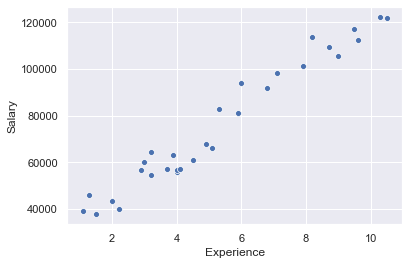

In [ ]:
experience = [1.1,1.3,1.5,2,2.2,2.9,3,3.2,3.2,3.7,3.9,4,4,4.1,4.5,4.9,5.1,5.3,5.9,6,6.8,7.1,7.9,8.2,8.7,9,9.5,9.6,10.3,10.5]
salary = [39343,46205,37731,43525,39891,56642,60150,54445,64445,57189,63218,55794,56957,57081,61111,67938,66029,83088,81363,93940,91738,98273,101302,113812,109431,105582,116969,112635,122391,121872]

ax = sns.scatterplot(x=experience, y=salary)
ax.set(xlabel='Experience', ylabel='Salary')
plt.show()

We can visually see from the above ```scatterplot``` that there is a linear relationship between $X$ and $y$.

Train a ```simple linear regression``` on the ```experience``` and ```salary``` data using the ```train``` function created above.

Once you have trained the model, use the ```predict``` function to predict the expected salary of a person with $10$ years of experience.

Pass the parameters to the $2$ functions as necessary.

In [ ]:
beta_1, beta_0 = train(experience, salary)
y_pred = predict(10, beta_1, beta_0)
print("Expected salary of a person with 10 years experience: $"+str(round(y_pred,2)))

Expected salary of a person with 10 years experience: $120291.82


#Multiple Linear Regression
 
Till now we have seen linear relations between one independent input variable ($X$) and one dependent output variable ($y$).
 
Contrast this with the case where the output variable ($y$) is dependent on multiple independent input variables ($X = \{x^{(1)}, ..., x^{(m)}\}$). The linear regression model when we have $1$ output variable depending on multiple input variables is called **Multiple Linear Regression**.
 
The ```multiple linear regression``` model equation is of the form -
 
$$\tilde y = \sum_{i=1}^{m}\beta_i x_i + \beta_0$$
 
Let us consider the following example, where we will attempt to predict the ```apparent temperature``` ($\tilde y$), given ```temperature``` ($x^{(1)}$) and ```humidity``` ($x^{(2)}$).

First let us initialize our data into a ```Pandas DataFrame``` and print the first $5$ rows of data.

In [ ]:
data = {
  "humidity" : [0.89,0.89,0.83,0.83,0.85,0.95,0.89,0.82,0.72,0.67,0.54,0.55,0.51,0.47,0.46,0.6,0.63,0.69,0.7,0.77,0.76,0.79,0.77,0.62,0.66,0.8,0.79,0.82,0.83,0.85,0.83,0.78,0.72,0.61,0.52,0.46,0.4,0.4,0.37,0.4,0.36,0.43,0.5,0.53,0.55,0.58,0.59,0.6,0.63,0.87,0.83,0.89,0.95,0.93,0.93,0.82,0.79,0.84,0.73,0.67,0.67,0.71,0.74,0.81,0.9,0.86,0.99,0.93,0.96,0.96,0.96,0.96,0.93,0.82,0.93,0.93,0.93,0.93,0.93,0.93,0.8,0.86,0.84,0.77,0.71,0.71,0.71,0.76,0.66,0.7,0.7,0.66,0.71,0.72,0.72,0.75,0.75,0.88,0.76,0.7,0.73,0.76,0.76,0.76,0.71,0.73,0.72,0.7,0.7,0.65,0.62,0.65,0.65,0.7,0.75,0.75,0.82,0.83,0.84,0.85,0.88,0.88,0.91,0.94,0.93,0.92,0.92],
  "temperature" : [9.47,9.38,8.29,8.76,9.22,7.73,8.77,10.82,13.77,16.02,17.14,17.8,17.33,18.88,18.91,15.39,15.55,14.26,13.14,11.55,11.18,10.12,10.2,10.42,9.91,11.18,7.16,6.11,6.79,7.26,7.8,9.87,12.22,15.09,17.36,19.01,20.04,21.05,21.18,20.12,20.22,20,17.8,16.06,15.02,14.42,14.26,13.77,13.28,8.63,11.25,11.18,10.69,11.11,11.11,12.17,12.76,13.84,16.18,17.52,17.38,17.36,17.21,15.63,13.58,10.91,8.8,8.96,8.2,7.69,7.77,8.2,8.18,7.31,7.64,6.62,6.68,6.09,6.07,6.14,7.13,7.21,7.57,8.9,9.96,9.89,11.07,10.12,11.04,10.65,10.05,9.9,8.79,7.83,7.86,7.32,7.24,5.44,7.2,6.69,6.21,6.11,6.11,6.17,7.22,7.29,7.41,7.96,8.03,9.08,9.05,9.05,9.18,9.07,7.98,8.07,7.89,7.31,7.34,6.62,6.07,8.34,5.18,3.72,4.86,5.21,6.26],
  "apparent_temp" : [7.39,9.38,5.94,6.98,7.11,5.52,6.53,10.82,13.77,16.02,17.14,17.8,17.33,18.88,18.91,15.39,15.55,14.26,13.14,11.55,11.18,10.12,10.2,10.42,7.57,11.18,5.04,4.82,4.27,5.16,5.53,7.93,12.22,15.09,17.36,19.01,20.04,21.05,21.18,20.12,20.22,20,17.8,16.06,15.02,14.42,14.26,13.77,13.28,5.47,11.25,11.18,10.69,11.11,11.11,12.17,12.76,13.84,16.18,17.52,17.38,17.36,17.21,15.63,13.58,10.91,5.29,5.78,4.61,3.72,4.65,5.07,4.37,6.18,5.04,2.62,3.22,1.65,1.63,1.49,2.69,3.23,3.54,5.16,6.64,6.55,11.07,10.12,11.04,10.65,10.05,7.72,6.82,5.41,6.12,6.21,6.01,5.44,4.55,3.16,2.69,2.8,2.44,2.92,3.83,4.24,4.82,6.07,7.58,9.08,9.05,9.05,9.18,7.46,6.81,6.43,6.13,4.81,5.18,4.11,3.41,8.34,4.11,2.57,3.71,5.21,4.64]
}
 
import pandas as pd
df = pd.DataFrame(data)
 
print(df.head())

   humidity  temperature  apparent_temp
0      0.89         9.47           7.39
1      0.89         9.38           9.38
2      0.83         8.29           5.94
3      0.83         8.76           6.98
4      0.85         9.22           7.11


Before we try to fit a linear regression model on our data, let us verify visually that a linear relation actually exists between the two independent input variables (```temperature``` and ```humidity```) and the dependent output variable (```apparent temperature```).

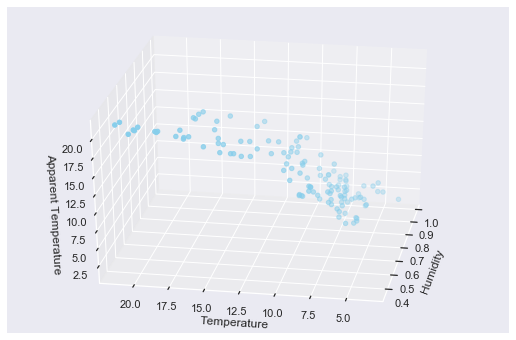

In [ ]:
 from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["humidity"], df["temperature"], df["apparent_temp"], c='skyblue', s=20)
ax.set_xlabel('Humidity')
ax.set_ylabel('Temperature')
ax.set_zlabel('Apparent Temperature')
ax.view_init(30, 190)
plt.show()

The skyblue points in the $3$-D scatterplot above corresponds to all the different data points on our dataset. We can visually see that the data points all *almost* lie on a plane.
 
*If there is a truly linear relation between our $2$ independent and $1$ dependent variables, then all the data points should've lied perfectly on a plane. But the real-world is noisy. There might be errors while sensing the $X$s and $y$ through some sensors. There might be other minor factors that affects these variables.*
 
You might've guessed that the way we plotted a ```best-fitting line``` when we had one independent variable, we will plot (and use for prediction) a ```best-fitting plane``` now that we have $2$ independent variables.
 
The equation corresponding to the plane representing our linear regression model will be of the form -
 
$$\tilde y = \beta_2 x^{(2)} + \beta_1 x^{(1)} + \beta_0$$

More specifically, to predict the $i$-th data point, we will use the equation -

$$\tilde y_i = \beta_2 x_i^{(2)} + \beta_1 x_i^{(1)} + \beta_0$$
<br /><br />
In general, we will draw a $n$-D ```hyper-plane``` when we have $n$ independent input variables.

In [ ]:
from sklearn.linear_model import LinearRegression
 
#Split data into X and y
X = df[["temperature","humidity"]]
y = df[["apparent_temp"]]
 
model = LinearRegression()
model.fit(X,y)
print("Coefficient beta_2 for temp:\t"+str(round(model.coef_[0][0],6)))
print("Coefficient beta_1 for hum:\t"+str(round(model.coef_[0][1],6)))
print("Coefficient beta_0 for bias:\t"+str(round(model.intercept_[0],6)))

Coefficient beta_2 for temp:	1.229221
Coefficient beta_1 for hum:	0.026214
Coefficient beta_0 for bias:	-3.773634


Now that we have trained our linear regression model by figuring out the values of the coefficients $\beta_0,\;\beta_1$, and $\beta_2$, we can use the trained model to predict the ```apparent temperature``` for unknown ```temperature``` and ```humidity```.
 
Let us predict the ```apparent temperature``` ($\tilde y$) for ```temperature``` $(x^{(1)}) = 9.36°C$ and ```humidity``` $(x^{(2)}) = 0.86\;(86\%)$.

In [ ]:
new_data = {
  "temperature" : [9.36],
  "humidity": [0.86]
}
y_hat = model.predict(pd.DataFrame(new_data))
print("The predicted value is: "+str(round(y_hat[0][0],2)))

The predicted value is: 7.75


Our model has predicted $\tilde y = 7.75°C$, while the actual value is $y=7.23°C$. There is an error of $0.52°C$, which seems pretty low for day-to-day scenarios.
 
But depending on the application (for example, nuclear power plant), this might be unacceptable. We might need a more complex (nonlinear) model for better accuracy and precision.

Along with other algorithms, ```Artificial Neural Networks (ANN)``` can be used to model complex (nonlinear) relations of any degree.
 
#Conclusion
 
In this experiment, you have -
*   Implemented and used an algorithm for ```Machine Learning``` - instead of writing an application to predict some value, we taught the computer to predict the value on its own by learning patterns from examples
*   Learnt about ```linear regression```, and the difference between ```Simple Linear Regression``` and ```Multiple Linear Regression```
*   Learnt the meaning of ```residual``` errors, and observed that the objective in linear regression is to find the coefficients of a linear equation that minimizes the ```sum of squared residuals```
*   Learnt to calculate the coefficients $\beta_1$ and $\beta_0$ for a ```Simple Linear Regression``` model and use the model to predict a dependent variable ($\tilde y$).
*   Saw how to use ```Pandas``` and ```Scikit-learn``` to train a ```Multiple Linear Regression``` model and use the model to predict the dependent variable ($\tilde y$) for an unknown data.
 
Kudos! You deserve a round of applause. You have implemented and used an extremely popular algorithm in **predictive data analysis**. There are scores of other algorithms (beyond the scope of this course) that can model your data in much more complex manner to do better predictions.
 
**Data Analysis** and **Machine Learning** are very interesting domains in Computer Science. I urge you to explore the domains on your own, and hope that you will find them interesting enough to join me in learning more about them.